# Integrantes:
Juan Sebastián Garés Carranza     
Cod:201628949

Angela Patricia Ordoñez Castro    
Cod:201628709

# Exercise 04

# Fraud Detection

## Introduction

- Fraud Detection Dataset from Microsoft Azure: [data](http://gallery.cortanaintelligence.com/Experiment/8e9fe4e03b8b4c65b9ca947c72b8e463)

Fraud detection is one of the earliest industrial applications of data mining and machine learning. Fraud detection is typically handled as a binary classification problem, but the class population is unbalanced because instances of fraud are usually very rare compared to the overall volume of transactions. Moreover, when fraudulent transactions are discovered, the business typically takes measures to block the accounts from transacting to prevent further losses. 

In [41]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [42]:
import zipfile
with zipfile.ZipFile('../datasets/fraud_detection.csv.zip', 'r') as z:
    f = z.open('15_fraud_detection.csv')
    data = pd.io.parsers.read_table(f, index_col=0, sep=',')

In [43]:
data.head()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0,Label
0,2000,0,0,0.00,720.25,5.064533,0.421214,1.312186,0.566395,3279.574306,1.218157,599.00,626.164650,1.259543,4.745402,0
1,62,1,1,1185.44,2530.37,0.538996,0.481838,4.401370,4.500157,61.970139,4.035601,1185.44,1185.440000,3.981118,4.921349,0
2,2000,0,0,0.00,0.00,5.064533,5.096396,3.056357,3.155226,0.000000,3.314186,32.09,32.090000,5.008490,4.742303,0
3,1,1,0,0.00,0.00,5.064533,5.096396,3.331154,3.331239,0.000000,3.529398,133.28,132.729554,1.324925,4.745402,0
4,1,1,0,0.00,132.73,5.412885,0.342945,5.563677,4.086965,0.001389,3.529398,543.66,543.660000,2.693451,4.876771,0


In [44]:
data.shape, data.Label.sum(), data.Label.mean()

((138721, 16), 797, 0.0057453449730033666)

In [45]:
X = data.drop(['Label'], axis=1)
y = data['Label']


# Exercice 04.1

Estimate a Logistic Regression

Evaluate using the following metrics:
* Accuracy
* F1-Score
* F_Beta-Score (Beta=10)

Comment about the results

In [46]:
# train/test split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


# train a logistic regression model
#from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)

# make predictions for testing set
y_pred_class = logreg.predict(X_test)
print(y_pred_class)
pd.value_counts(y_pred_class)

[0 0 0 ... 0 0 0]


0    34681
dtype: int64

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_class)

array([[34472,     0],
       [  209,     0]], dtype=int64)

In [48]:
# calculate testing accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.9939736455119518


El valor obtenido para el accuracy es bueno; sin embargo el modelo solo esta prediciendo los valores de la clase 0, 
por tal razón no es una medida confiable

In [49]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('precision_score ', precision_score(y_test, y_pred_class))
print('recall_score    ', recall_score(y_test, y_pred_class))
print('f1_score    ', f1_score(y_test, y_pred_class))

precision_score  0.0
recall_score     0.0
f1_score     0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


No es posible calcular el valor de f1_score debido a que el modelo clasifica todos los valores como clase 0

In [139]:
from sklearn.metrics import fbeta_score
fbeta_score(y_test, y_pred_class, average='macro', beta=10)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.49996998748664867

# Exercice 04.2

Under-sample the negative class using random-under-sampling

Which is parameter for target_percentage did you choose?
How the results change?

**Only apply under-sampling to the training set, evaluate using the whole test set**

# Solución:
Primero visualizamos los datos según las dos clases de la variable respuesta, para evidenciar la diferencia entre estas

In [51]:
#Cargamos las librerias necesarias 
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
plt.style.use('ggplot')

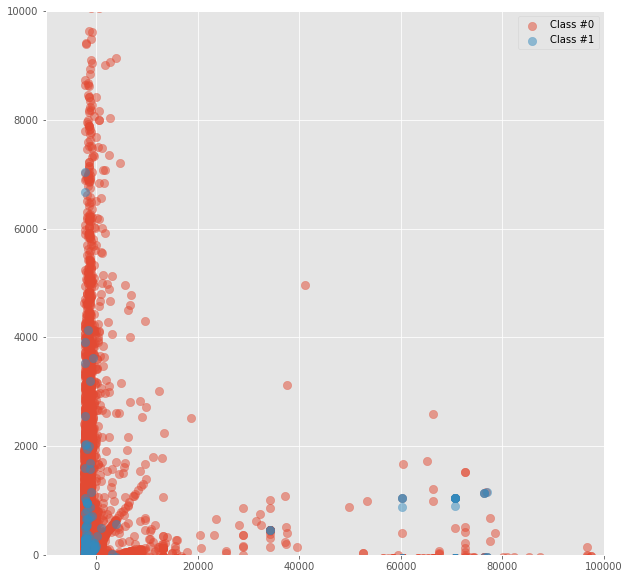

In [52]:
# Para gráficar los datos necesitamos resumirlos en dos dimensiones
pca = PCA(n_components = 2)

# transformamos los valores de x en dos dimensiones para visualizarlos 
x_pca = pca.fit_transform(X_train)

# La siguiente función se utilizará para realizar las gráficas que nos permiten visualizar el comportamiento de los dat

def plot_two_classes(X, y, subplot=False, size=(10, 10), xlim=[-10000,100000], ylim=[0,10000]):
    # Plot the two classes
    if subplot == False:
        fig, subplot = plt.subplots(nrows=1, ncols=1, figsize=size)
        
    subplot.scatter(X[y==0, 0], X[y==0, 1], label="Class #0", 
                    alpha=0.5, s=70)
    subplot.scatter(X[y==1, 0], X[y==1, 1], label="Class #1", 
                    alpha=0.5, s=70)
    subplot.legend()
    subplot.set_xlim(xlim)
    subplot.set_ylim(ylim)
    return subplot

plot_two_classes(x_pca, y_train)

Se observan muy pocos valores para la categoría 1 en la variable de respuesta 

In [53]:
pd.value_counts(y_train)

0    103452
1       588
Name: Label, dtype: int64

En total solo el 0.06% de la muestra train pertenece a la clase 1 de la variable dependiente. Para tener una muestra balanceada tomaremos el 20% de los valores de la clase 1; con el siguiente código hacemos Undersampling :

In [54]:
def UnderSampling(X, y, target_percentage=0.2, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_0_new =  n_samples_1 / target_percentage - n_samples_1
    n_samples_0_new_per = n_samples_0_new / n_samples_0

    filter_ = y == 0

    np.random.seed(seed)
    rand_1 = np.random.binomial(n=1, p=n_samples_0_new_per, size=n_samples)
    
    filter_ = filter_ & rand_1
    filter_ = filter_ | (y == 1)
    filter_ = filter_.astype(bool)
    
    return X[filter_], y[filter_]


In [55]:
XUS_1, YUS_1 = UnderSampling(X_train,y_train, 0.2)

XUS_pca1 = pca.fit_transform(XUS_1)

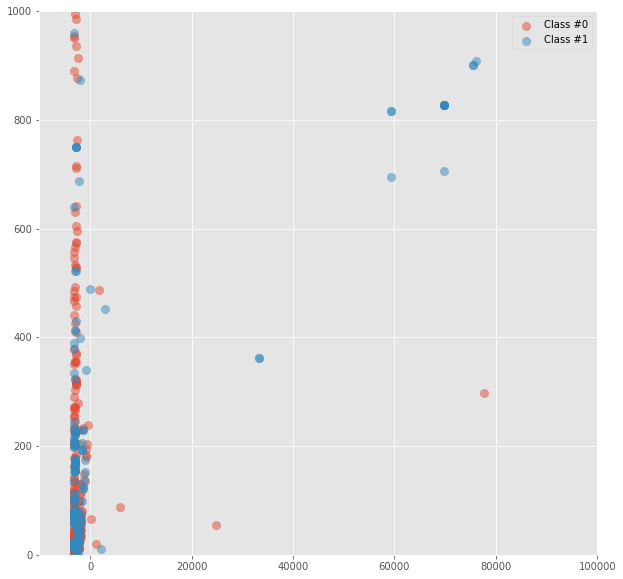

In [56]:
plot_two_classes(XUS_pca1, YUS_1, xlim=[-10000,100000], ylim=[0,1000])

In [57]:
pd.value_counts(YUS_1)

0    2297
1     588
Name: Label, dtype: int64

In [58]:
pd.value_counts(YUS_1)/sum(pd.value_counts(YUS_1))

0    0.796187
1    0.203813
Name: Label, dtype: float64

Con el nuevo dataset, se obtiene un 20% de datos de la clase 1. A continuación observaremos como cambian los resultados de predicción con las clases de la variable dependiente balanceadas:

In [59]:
#nuevamente corremos un módelo logit:
logreg = LogisticRegression(C=1e9)
m2=logreg.fit(XUS_1,YUS_1)

# Con el modelo
y_pred_class2 = m2.predict(X_test)
pd.value_counts(y_pred_class2)

0    33950
1      731
dtype: int64

Con el nuevo modelo ajustado, cálculamos nuevamente las medidas de desempeño del mismo:

In [60]:
#Matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_class2)

array([[33772,   700],
       [  178,    31]], dtype=int64)

El  modelo ya no clasifica todos los valores en la categoría 0: sin embargo la proporción de valores que clasifica en la clase 1 es más grande que la proporción real.

In [61]:
## calculavos el Accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class2))

0.9746835443037974


El valor de accuracy obtenido es inferior al ue se obtuvo con las clases imbalanceadas; sin embargo este valor es más confiable, debido a que el modelo no solo predice valores negativos sino tambinén positivos

In [62]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('precision_score ', precision_score(y_test, y_pred_class2))
print('recall_score    ', recall_score(y_test, y_pred_class2))
print('f1_score    ', f1_score(y_test, y_pred_class2))

precision_score  0.04240766073871409
recall_score     0.14832535885167464
f1_score     0.06595744680851064


En el item anterior no fue posible calcular el valor del f1_score debido a que el modelo solo estaba prediciendo los valores como negativos; sin embargo al balancear los datos, por el método de under-sampling, se obtiene un valor de aproximadamente 
6% para el f1_score, lo cuál nos indica que el modelo no es preciso; esto puede deberse a que en el momento de hacer el submuestreo, se pierde una cantidad de información importante de la clase negativa (0)

# Exercice 04.3

Now using random-over-sampling 

# Solución
Para este ejercicio usamos la función RandomOverSampler de la librería imblearn.over_sampling, así:

In [63]:
from imblearn.over_sampling import RandomOverSampler
# Apply the random over-sampling
ros = RandomOverSampler()
XUS_2, YUS_2 = ros.fit_sample(X_train, y_train)


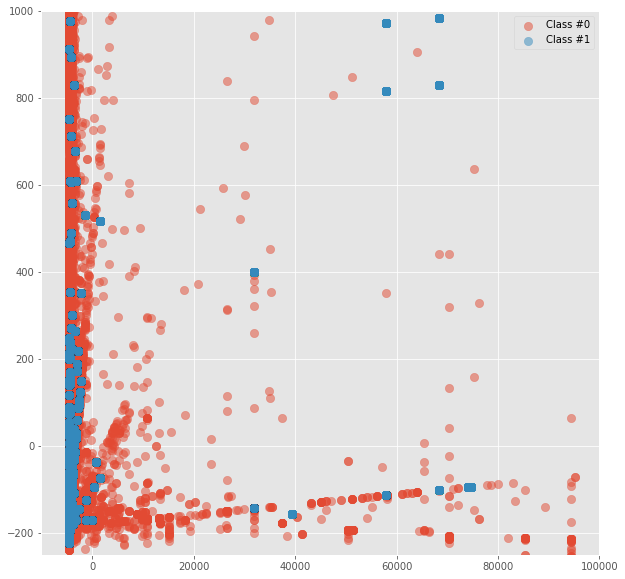

In [64]:
XUS_pca2 = pca.fit_transform(XUS_2)
plot_two_classes(XUS_pca2, YUS_2, xlim=[-10000,100000], ylim=[-250,1000])

In [65]:
pd.value_counts(YUS_2)

1    103452
0    103452
dtype: int64

La función utilizada replico los valores de la clase positiva(1) hasta igualarlos a la clase negativa (0), es decir que se obtiene una distribución del 50% en la clase 1 y 50% en la clase 0. Con esta nueva base de datos, corremos nuevamente el modelo de regresión logística y cálculamos los valores de desempeño del mismo:

In [66]:
#nuevamente corremos un módelo logit:
logreg = LogisticRegression(C=1e9)
m3=logreg.fit(XUS_2,YUS_2)

# Con el modelo 3:
y_pred_class3 = m3.predict(X_test)
pd.value_counts(y_pred_class3)

0    18722
1    15959
dtype: int64

In [67]:
#Matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_class3)

array([[18670, 15802],
       [   52,   157]], dtype=int64)

Se observa que el nuevo modelo ajustado sobreestima la clase 1

In [68]:
## calculavos el Accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class3))

0.542862085868343


El valor del accuracy encontrado mediante el modelo 3 es inferior al del modelo 2; es decir que este nuevo modelo tiene menor precisión que el ajustado a las clases balanceadas mediante undersampling

In [69]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('precision_score ', precision_score(y_test, y_pred_class3))
print('recall_score    ', recall_score(y_test, y_pred_class3))
print('f1_score    ', f1_score(y_test, y_pred_class3))

precision_score  0.009837709129644715
recall_score     0.7511961722488039
f1_score     0.0194210786739238


Por último el valor de f1_score encontrado mediante el modelo 3, es inferior al del modelo 2. Por está razón se concluye que el modelo 3 tampoco es preciso.

# Exercice 04.4*
Evaluate the results using SMOTE

Which parameters did you choose?

# SOLUCIÓN

Para este ejercicio usamos la función SMOTE de la librería imblearn.over_sampling, así:

In [95]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=10,k_neighbors=5,out_step=0.5)
XUS_3, YUS_3 = sm.fit_sample(X_train, y_train)

In [96]:
pd.value_counts(YUS_3)

1    103452
0    103452
dtype: int64

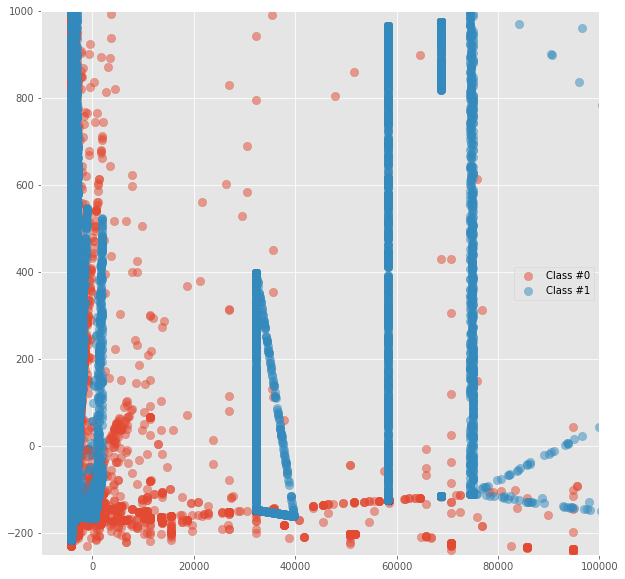

In [97]:
XUS_pca3 = pca.fit_transform(XUS_3)
plot_two_classes(XUS_pca3, YUS_3, xlim=[-10000,100000], ylim=[-250,1000])

Con la función SMOTE también se obtiene una clase balnceada al 50-50

Con el nuevo dataset construido a partir de la función SMOTE, corremos un nuevo modelo:

In [99]:
## calculavos el Accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class4))

0.5509645050604077


In [100]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('precision_score ', precision_score(y_test, y_pred_class4))
print('recall_score    ', recall_score(y_test, y_pred_class4))
print('f1_score    ', f1_score(y_test, y_pred_class4))

precision_score  0.009763880025526485
recall_score     0.7320574162679426
f1_score     0.019270734932930286


El modelo mejora la clasifcación de positivos que efectivamente son positivos; sin embargo la precisión sigue siendo muy baja.

# Exercice 04.5

Estimate a Logistic Regression, GaussianNB, K-nearest neighbors and a Decision Tree **Classifiers**

Evaluate using the following metrics:
* Accuracy
* F1-Score
* F_Beta-Score (Beta=10)

Comment about the results

Combine the classifiers and comment

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Solución

# 1.Logistic Regression:

In [106]:
logreg = LogisticRegression(C=1e9)
m1smote=logreg.fit(XUS_3,YUS_3)

# Modelo 1 con la base balanceada mediante SMOTE:
y_pred_class1_smote = m1smote.predict(X_test)


In [107]:
## calculavos el Accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class1_smote))

0.5509645050604077


In [108]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('precision_score ', precision_score(y_test, y_pred_class1_smote))
print('recall_score    ', recall_score(y_test, y_pred_class1_smote))
print('f1_score    ', f1_score(y_test, y_pred_class1_smote))

precision_score  0.009763880025526485
recall_score     0.7320574162679426
f1_score     0.019270734932930286


In [110]:
from sklearn.metrics import fbeta_score
fbeta_score(y_test, y_pred_class1_smote, average='macro', beta=10)


0.4874393538547045

# 2. Decision Tree Classifier

In [113]:
DTree = DecisionTreeClassifier()
m2smote=DTree.fit(XUS_3,YUS_3)

# Modelo 2 con la base balanceada mediante SMOTE:
y_pred_class2_smote = m2smote.predict(X_test)

In [115]:
## calculamos el Accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class2_smote))

0.9838816643118711


In [116]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('precision_score ', precision_score(y_test, y_pred_class2_smote))
print('recall_score    ', recall_score(y_test, y_pred_class2_smote))
print('f1_score    ', f1_score(y_test, y_pred_class2_smote))

precision_score  0.06683168316831684
recall_score     0.1291866028708134
f1_score     0.08809135399673736


In [118]:
from sklearn.metrics import fbeta_score
fbeta_score(y_test, y_pred_class2_smote, average='macro', beta=10)

0.5585615583366365

# 3. GaussianNB

In [120]:
GNB = GaussianNB()
m3smote=GNB.fit(XUS_3,YUS_3)

# Modelo 2 con la base balanceada mediante SMOTE:
y_pred_class3_smote = m3smote.predict(X_test)

In [121]:
## calculamos el Accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class3_smote))

0.22017819555376142


In [122]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('precision_score ', precision_score(y_test, y_pred_class3_smote))
print('recall_score    ', recall_score(y_test, y_pred_class3_smote))
print('f1_score    ', f1_score(y_test, y_pred_class3_smote))

precision_score  0.0069811875367430925
recall_score     0.9090909090909091
f1_score     0.013855970829535097


In [123]:
from sklearn.metrics import fbeta_score
fbeta_score(y_test, y_pred_class3_smote, average='macro', beta=10)

0.30825891291692126

# 4. K Neighbors Classifier

In [124]:
KNC = KNeighborsClassifier()
m4smote=KNC.fit(XUS_3,YUS_3)

# Modelo 2 con la base balanceada mediante SMOTE:
y_pred_class4_smote = m4smote.predict(X_test)

In [126]:
## calculamos el Accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class4_smote))

0.9351518122314812


In [127]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('precision_score ', precision_score(y_test, y_pred_class4_smote))
print('recall_score    ', recall_score(y_test, y_pred_class4_smote))
print('f1_score    ', f1_score(y_test, y_pred_class4_smote))

precision_score  0.029085872576177285
recall_score     0.3014354066985646
f1_score     0.05305263157894737


In [128]:
from sklearn.metrics import fbeta_score
fbeta_score(y_test, y_pred_class4_smote, average='macro', beta=10)

0.6076913162822114

El mejor modelo encontrado es el árbol de clasificación, con el cuál se obtuvo un Accuracy de 0.98, un f1_score de 9% y un fbeta_score de 0.55. 
Sin embargo el valor de f1_score nos indica que el modelo no esta bien balanceado dado que solo esta detectando el 6% de los positivos y solo el 12% de estos positivos son verdaderamente positivos.

# Exercice 04.6

Using the under-sampled dataset

Evaluate a RandomForestClassifier and compare the results

change n_estimators=100, what happened

In [135]:
RFC = RandomForestClassifier()
m1Under=RFC.fit(XUS_1,YUS_1)
# Modelo 1 Random Forest con la base balanceada mediante UnderSamping:
y_pred_class1_Under = m1Under.predict(X_test)

In [136]:
## calculamos el Accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class1_Under))

0.9601799256076814


In [137]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('precision_score ', precision_score(y_test, y_pred_class1_Under))
print('recall_score    ', recall_score(y_test, y_pred_class1_Under))
print('f1_score    ', f1_score(y_test, y_pred_class1_Under))

precision_score  0.05606060606060606
recall_score     0.35406698564593303
f1_score     0.09679529103989536


In [138]:
from sklearn.metrics import fbeta_score
fbeta_score(y_test, y_pred_class1_Under, average='macro', beta=10)

0.6502630114147481

Este último modelo Random Forest, el cuál se ajusto en la base de datos blanceada mediante underSampling, supera los demás modelos analizados, debido a que se obtiene un F1_score superior a los demás; sin embargo la precisión sigue siendo baja, dado que el modelo subestima la clase 1, este módelo podría ajustarse perfeccionando la técnica de balanceo en la clase de la variable a clasificar.